In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
nombres= np.loadtxt('../Datos/LES_python.txt',dtype='U',max_rows=1,delimiter=',')
nombres[0]='tiempo'
nombres[1]='To'
nombres[2]='TClima'
nombres[3]='TGuarda'
nombres[4]='Thabitacion'
nombres

array(['tiempo', 'To', 'TClima', 'TGuarda', 'Thabitacion'], dtype='<U62')

In [25]:
archivo = '../Datos/LES_python.txt'
def importa(archivo,nombres):
    IDF= pd.read_csv(archivo,names=nombres,skiprows=1)
    IDF.tiempo= IDF.tiempo.str.replace('24:00:00','23:59:59')
    IDF.tiempo= '2019'+' '+ IDF.tiempo
    IDF.tiempo= pd.to_datetime(IDF.tiempo,format='%Y %m/%d %H:%M:%S')
    start_date = '2019 02/01'
    end_date   = '2019 02/02'
    IDF= IDF.loc[(IDF['tiempo'] > start_date) & (IDF['tiempo'] <= end_date)]
    IDF.set_index(IDF.tiempo,inplace=True)
    upsampled= IDF.resample('1Min').pad()
    IDF= upsampled.interpolate(method='time')
    IDF= upsampled.interpolate(method='time')
    del IDF['tiempo']
    return IDF
IDF = importa('../Datos/LES_python.txt',nombres)

### Pyhon como ener-habitat

<AxesSubplot:xlabel='tiempo'>

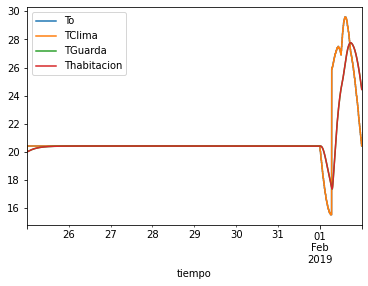

In [5]:
LES_python = importa('../Datos/LES_python.txt',nombres)
LES_python.plot()

#### prueba con coeficente h en SC de 100 y 10 y en muro opuesto 0.1 y 100

<AxesSubplot:xlabel='tiempo'>

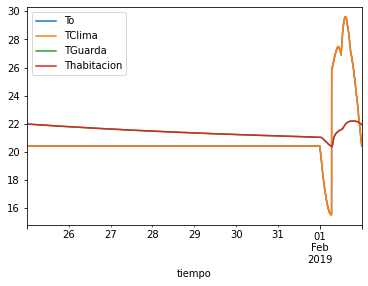

In [7]:
python_Mopuesto_01 = importa('../IDF/LES_python/LES_python_Mopuesto_01.csv',nombres)
python_Mopuesto_01.plot()

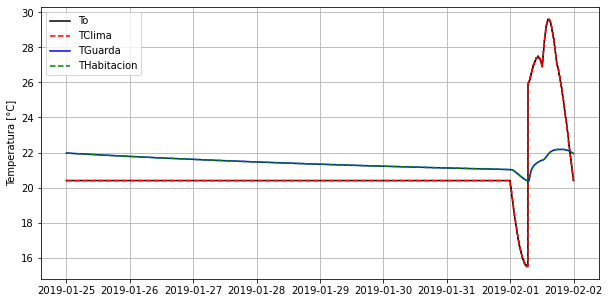

In [8]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.ylabel('Temperatura [°C]')
#plt.title("IDF en condiciones de ener-habitat")

ax.plot(python_Mopuesto_01.To, 'k', label   = 'To')
ax.plot(python_Mopuesto_01.TClima, 'r--', label   = 'TClima')
ax.plot(python_Mopuesto_01.TGuarda, 'b', label   = 'TGuarda')
ax.plot(python_Mopuesto_01.Thabitacion, 'g--', label   = 'THabitacion')


plt.grid()
ax.legend()

In [15]:
Mopuesto_NoMass = importa('../Datos/Mopuesto_NoMass.csv',nombres)

<AxesSubplot:xlabel='tiempo'>

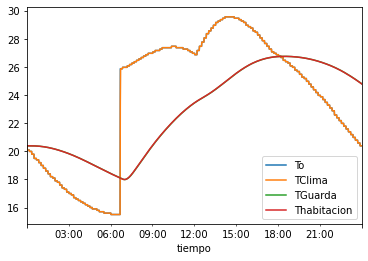

In [16]:
Mopuesto_NoMass.plot()

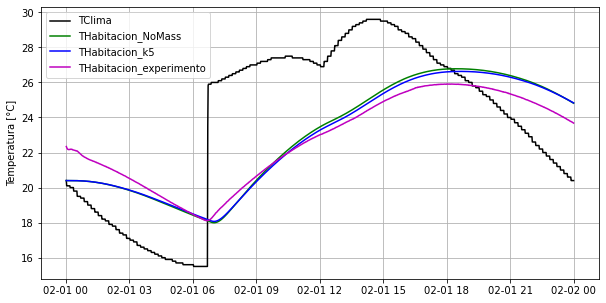

In [46]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.ylabel('Temperatura [°C]')
#plt.title("IDF en condiciones de ener-habitat")

#ax.plot(Mopuesto_NoMass.To, 'k', label   = 'To')
ax.plot(Mopuesto_NoMass.TClima, 'k', label   = 'TClima')
#ax.plot(Mopuesto_NoMass.TGuarda, 'r--', label   = 'TGuarda')
ax.plot(Mopuesto_NoMass.Thabitacion, 'g', label   = 'THabitacion_NoMass')
ax.plot(Mopuesto_k5.Thabitacion, 'b', label   = 'THabitacion_k5')
#ax.plot(Mopuesto_k5_13_6p6.Thabitacion, 'c', label   = 'THabitacion_k5_13_6.6')
ax.plot(LES.Ti, 'm', label   = 'THabitacion_experimento')

plt.grid()
ax.legend()

In [18]:
nombres=np.loadtxt('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',dtype='U',max_rows=1,skiprows=2,delimiter='\t')
nombres[0]='fecha'
nombres[1]='hora'
nombres[3]='Ti'
nombres[7]='To'
nombres[5]='Tg'
nombres[8]='Tsi_SC'
nombres[9]='Tso_SC'
LES=pd.read_csv('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',names=nombres,sep='\t',skiprows=3)
LES.hora = LES.hora.str.replace('p. m.','PM',regex=True)
LES.hora = LES.hora.str.replace('a. m.','AM',regex=True)
LES['time']=LES.fecha+ ' ' +LES.hora
LES.time= pd.to_datetime(LES.time,dayfirst=True)
LES.set_index('time',inplace=True)
del LES['fecha']
del LES['hora']
upsampled     = LES.resample('1Min').pad()
LES= upsampled.interpolate(method='time')
LES=LES.drop(LES.index[0])

In [20]:
dt=Mopuesto_NoMass.index-LES.index
LES.index=LES.index+dt

In [26]:
Mopuesto_k5 = importa('../Datos/Mopuesto_k5.txt',nombres)

In [31]:
Mopuesto_k5_13_6p6 = importa('../Datos/Mopuesto_k5_h13_6.6.txt',nombres)